In [169]:
import matplotlib
%matplotlib inline
import seaborn as sns


In [170]:
# library imports
import numpy as np
import pandas as pd
import scipy as sc

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split #training and testing data split
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn import utils
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from datetime import datetime, timedelta
from sklearn.metrics import roc_auc_score
 
import time

In [171]:
# Load Train and Test CSV

headerNames = ["id","Gender","age","hypertension","heart_disease","ever_married","work_type",
               "Residence_type","avg_glucose_level","bmi","smoking_status","stroke"]
prefix = "./data/"

# ID cannot be used for prediction 
# hence setting index_col = 0 takes care of removing ID field from dataset in both train and test dataframes.
traindf = pd.read_csv(prefix + "train.csv", header=None, delim_whitespace=False,  names=headerNames, index_col=0,) 
testdf = pd.read_csv(prefix + "test.csv", header=None, delim_whitespace=False,  names=headerNames, index_col=0,)
testdf = testdf.drop('stroke', axis=1)

#sample data for a quick run
#traindf = traindf.sample(frac=0.25, replace=True)

traindf.shape

(43400, 11)

In [172]:
traindf.head(10)

,Gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0


In [173]:
# Set of Unique Values for stroke - it is a binary classification problem
print(traindf['Gender'].unique())
print(traindf['ever_married'].unique())
print(traindf['work_type'].unique())
print(traindf['Residence_type'].unique())
print(traindf['smoking_status'].unique())
print(traindf['stroke'].unique())

traindf.columns

['Male' 'Female' 'Other']
['No' 'Yes']
['children' 'Private' 'Never_worked' 'Self-employed' 'Govt_job']
['Rural' 'Urban']
[nan 'never smoked' 'formerly smoked' 'smokes']
[0 1]


Index(['Gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [174]:
# Train Data Stats
traindf.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [175]:
# stats of categorical features
traindf.describe(include=['O'])

,Gender,ever_married,work_type,Residence_type,smoking_status
count,43400,43400,43400,43400,30108
unique,3,2,5,2,3
top,Female,Yes,Private,Urban,never smoked
freq,25665,27938,24834,21756,16053


In [176]:
# for starters, fill every nan value with mean column values across the dataset.
# set to 0 for feature selection
#traindf = traindf.fillna(0.0) 
#testdf = testdf.fillna(0.0) 

#fill NaN values with mean for training
traindf['bmi'].fillna(0.0, inplace=True) 
testdf['bmi'].fillna(0.0, inplace=True) 

#traindf['gender'].fillna(traindf['gender'].dropna().mean(), inplace=True)
#traindf['age'].fillna(traindf['age'].dropna().mean(), inplace=True)
#traindf['hypertension'].fillna(traindf['Existing_EMI'].dropna().mean(), inplace=True)
#traindf['Loan_Amount'].fillna(traindf['Loan_Amount'].dropna().mean(), inplace=True)
#traindf['Loan_Period'].fillna(traindf['Loan_Period'].dropna().mean(), inplace=True)
#traindf['Interest_Rate'].fillna(traindf['Interest_Rate'].dropna().mean(), inplace=True)
#traindf['EMI'].fillna(traindf['EMI'].dropna().mean(), inplace=True)

#fill NaN values with mean for test
#testdf['Employer_Category2'].fillna(testdf['Employer_Category2'].dropna().mean(), inplace=True)
#testdf['Monthly_Income'].fillna(testdf['Monthly_Income'].dropna().mean(), inplace=True)
#testdf['Existing_EMI'].fillna(testdf['Existing_EMI'].dropna().mean(), inplace=True)
#testdf['Loan_Amount'].fillna(testdf['Loan_Amount'].dropna().mean(), inplace=True)
#testdf['Loan_Period'].fillna(testdf['Loan_Period'].dropna().mean(), inplace=True)
#testdf['Interest_Rate'].fillna(testdf['Interest_Rate'].dropna().mean(), inplace=True)
#testdf['EMI'].fillna(testdf['EMI'].dropna().mean(), inplace=True)

#traindf.head(10)

In [177]:
# Feature Engineering - Convert Categorical Data to Numeric > Gender
# convert Gender to numeric

#Train Data
traindf['Gender_numeric']  = 0.0 # default value
traindf.loc[traindf['Gender'] == 'Male', 'Gender_numeric'] = 1.0
traindf.loc[traindf['Gender'] == 'Female', 'Gender_numeric'] = 2.0
traindf.loc[traindf['Gender'] == 'Other', 'Gender_numeric'] = 3.0
traindf = traindf.drop('Gender', axis=1)

#Test Data
testdf['Gender_numeric']  = 0.0 # default value
testdf.loc[testdf['Gender'] == 'Male', 'Gender_numeric'] = 1.0
testdf.loc[testdf['Gender'] == 'Female', 'Gender_numeric'] = 2.0
testdf.loc[testdf['Gender'] == 'Other', 'Gender_numeric'] = 3.0
testdf = testdf.drop('Gender', axis=1)

In [178]:
# Feature Engineering - Convert Categorical Data to Numeric > ever_married
# convert ever_married to numeric

#Train Data
traindf['ever_married_numeric']  = 0.0 # default value
traindf.loc[traindf['ever_married'] == 'No', 'ever_married_numeric'] = 1.0
traindf.loc[traindf['ever_married'] == 'Yes', 'ever_married_numeric'] = 2.0
traindf = traindf.drop('ever_married', axis=1)

#Test Data
testdf['ever_married_numeric']  = 0.0 # default value
testdf.loc[testdf['ever_married'] == 'No', 'ever_married_numeric'] = 1.0
testdf.loc[testdf['ever_married'] == 'Yes', 'ever_married_numeric'] = 2.0
testdf = testdf.drop('ever_married', axis=1)


In [179]:
# Feature Engineering - Convert Categorical Data to Numeric > work_type
# convert work_type to numeric
#['children' 'Private' 'Never_worked' 'Self-employed' 'Govt_job']

#Train Data
traindf['work_type_numeric']  = 0.0 # default value
traindf.loc[traindf['work_type'] == 'children', 'work_type_numeric'] = 1.0
traindf.loc[traindf['work_type'] == 'Private', 'work_type_numeric'] = 2.0
traindf.loc[traindf['work_type'] == 'Never_worked', 'work_type_numeric'] = 3.0
traindf.loc[traindf['work_type'] == 'Self-employed', 'work_type_numeric'] = 4.0
traindf.loc[traindf['work_type'] == 'Govt_job', 'work_type_numeric'] = 5.0
traindf = traindf.drop('work_type', axis=1)

#Test Data
testdf['work_type_numeric']  = 0.0 # default value
testdf.loc[testdf['work_type'] == 'children', 'work_type_numeric'] = 1.0
testdf.loc[testdf['work_type'] == 'Private', 'work_type_numeric'] = 2.0
testdf.loc[testdf['work_type'] == 'Never_worked', 'work_type_numeric'] = 3.0
testdf.loc[testdf['work_type'] == 'Self-employed', 'work_type_numeric'] = 4.0
testdf.loc[testdf['work_type'] == 'Govt_job', 'work_type_numeric'] = 5.0
testdf = testdf.drop('work_type', axis=1)


In [180]:
# Feature Engineering - Convert Categorical Data to Numeric > Residence_type
# convert Residence_type to numeric
#['Rural' 'Urban']

#Train Data
traindf['Residence_type_numeric']  = 0.0 # default value
traindf.loc[traindf['Residence_type'] == 'Rural', 'Residence_type_numeric'] = 1.0
traindf.loc[traindf['Residence_type'] == 'Urban', 'Residence_type_numeric'] = 2.0
traindf = traindf.drop('Residence_type', axis=1)

#Test Data
testdf['Residence_type_numeric']  = 0.0 # default value
testdf.loc[testdf['Residence_type'] == 'Rural', 'Residence_type_numeric'] = 1.0
testdf.loc[testdf['Residence_type'] == 'Urban', 'Residence_type_numeric'] = 2.0
testdf = testdf.drop('Residence_type', axis=1)


In [181]:

# Feature Engineering - Convert Categorical Data to Numeric > smoking_status
# convert smoking_status to numeric
#[nan 'never smoked' 'formerly smoked' 'smokes']

#Train Data
traindf['smoking_status_numeric']  = 0.0 # default value
traindf.loc[traindf['smoking_status'] == 'never smoked', 'smoking_status_numeric'] = 1.0
traindf.loc[traindf['smoking_status'] == 'formerly smoked', 'smoking_status_numeric'] = 2.0
traindf.loc[traindf['smoking_status'] == 'smokes', 'smoking_status_numeric'] = 3.0
traindf = traindf.drop('smoking_status', axis=1)

#Test Data
testdf['smoking_status_numeric']  = 0.0 # default value
testdf.loc[testdf['smoking_status'] == 'never smoked', 'smoking_status_numeric'] = 1.0
testdf.loc[testdf['smoking_status'] == 'formerly smoked', 'smoking_status_numeric'] = 2.0
testdf.loc[testdf['smoking_status'] == 'smokes', 'smoking_status_numeric'] = 3.0
testdf = testdf.drop('smoking_status', axis=1)
print(testdf['smoking_status_numeric'].unique())

[ 2.  0.  1.  3.]


In [182]:
# convert integer based columns to float
traindf['hypertension'] = traindf['hypertension'].astype(float)
traindf['heart_disease'] = traindf['heart_disease'].astype(float)
traindf['stroke'] = traindf['stroke'].astype(float)

testdf['hypertension'] = testdf['hypertension'].astype(float)
testdf['heart_disease'] = testdf['heart_disease'].astype(float)

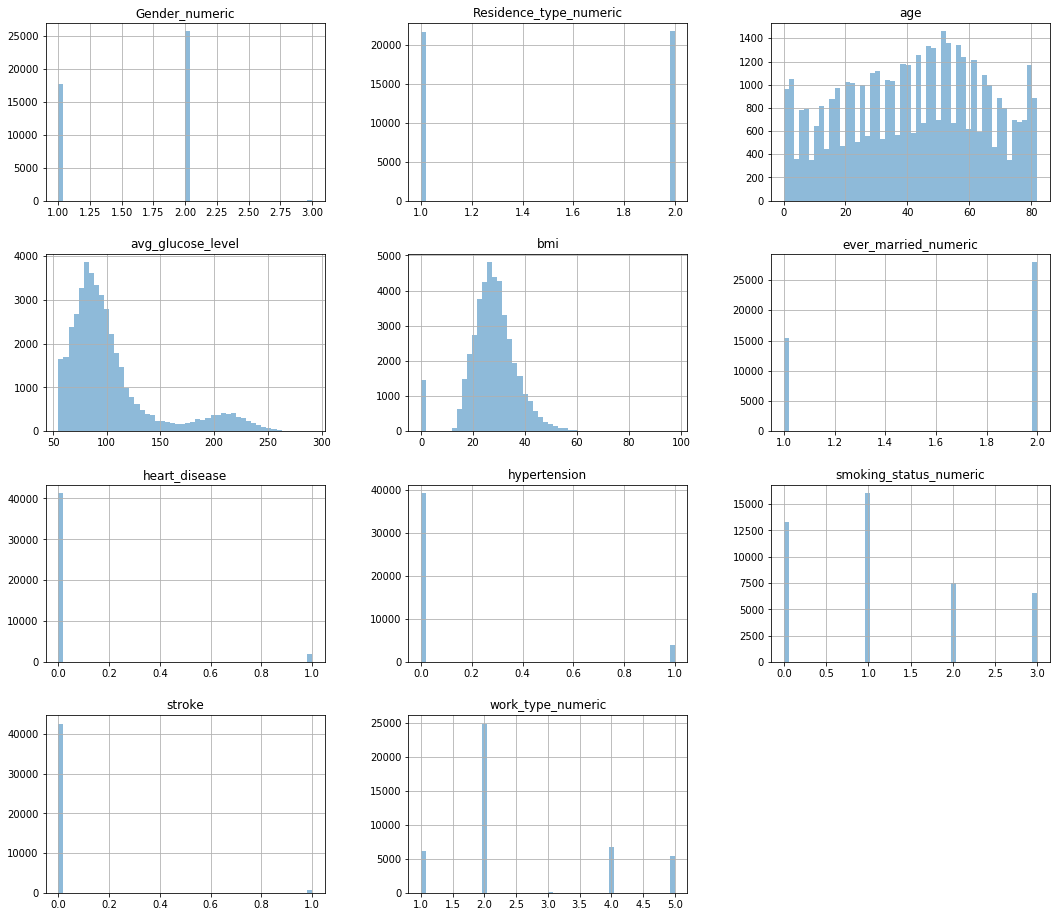

In [183]:
fig=plt.gcf()
traindf.hist(figsize=(18, 16), alpha=0.5, bins=50)
plt.show()
fig.savefig('histograms.png')

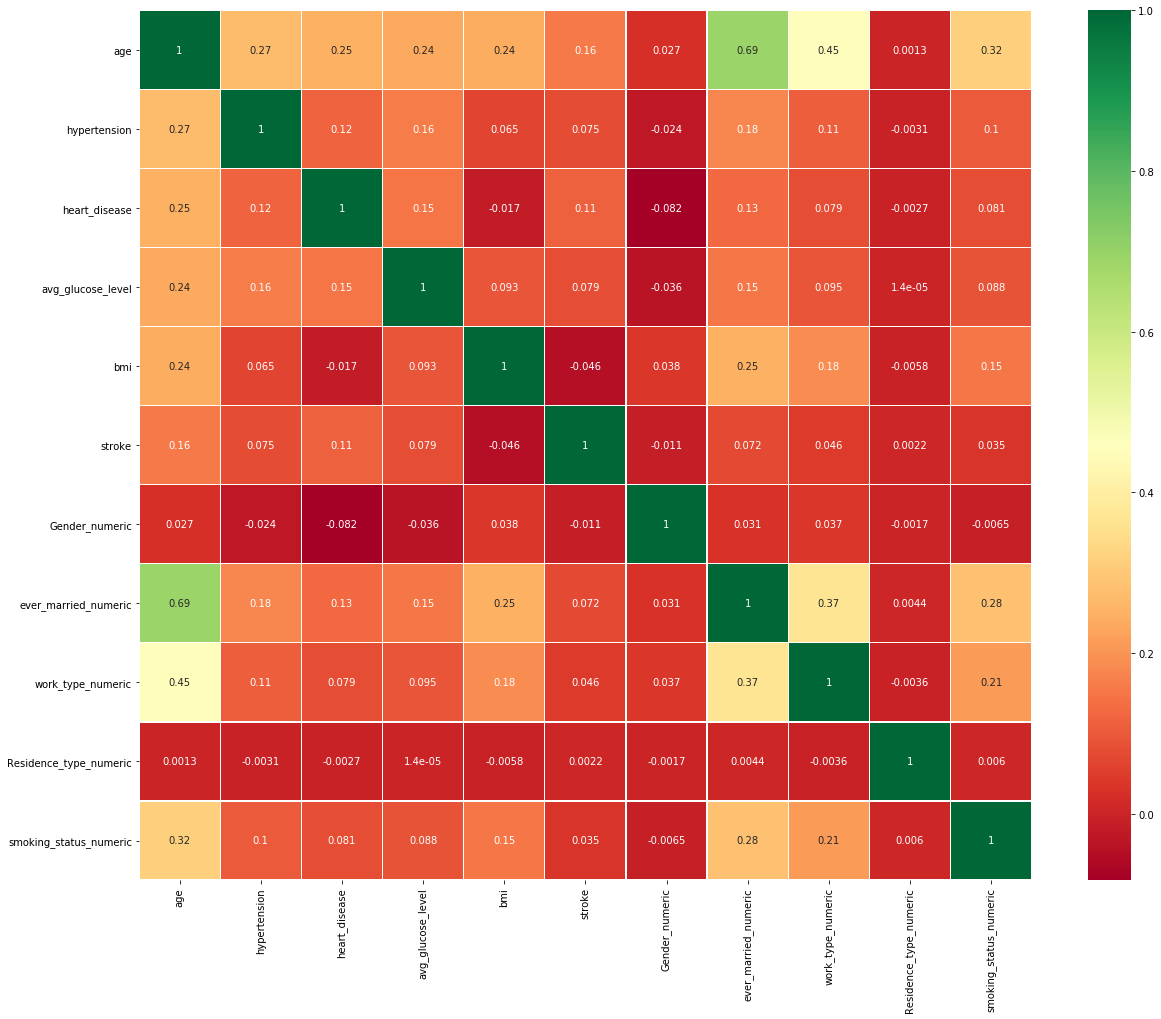

In [184]:
sns.heatmap(traindf.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,16)
#plt.show()
fig.savefig('Correlation_before.png')

In [185]:
#drop based on very low positive or negative correlation

traindf = traindf.drop('Residence_type_numeric', axis=1)
testdf = testdf.drop('Residence_type_numeric', axis=1)


traindf = traindf.drop('Gender_numeric', axis=1)
testdf = testdf.drop('Gender_numeric', axis=1)



traindf = traindf.drop('smoking_status_numeric', axis=1)
testdf = testdf.drop('smoking_status_numeric', axis=1)



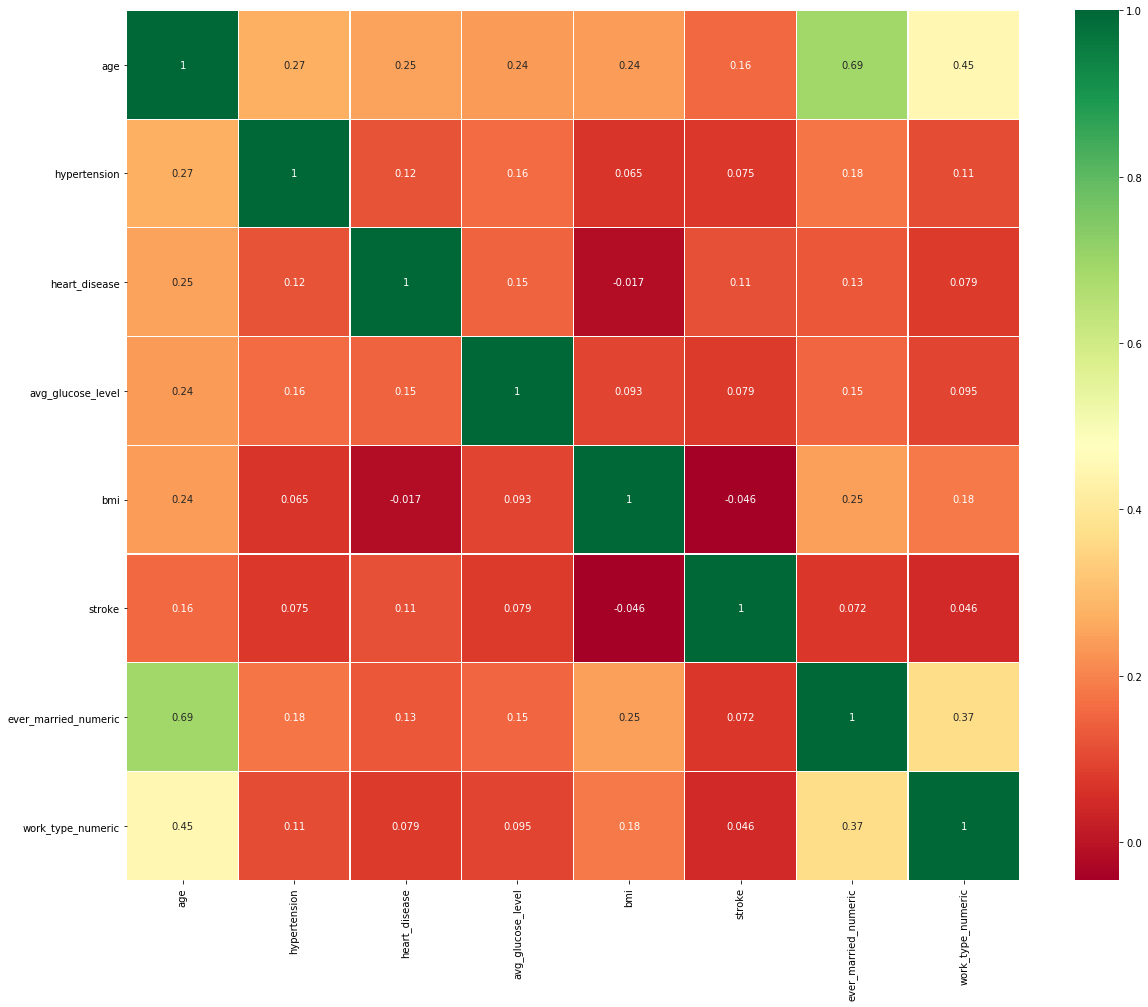

In [186]:
sns.heatmap(traindf.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,16)
plt.show()
fig.savefig('Correlation_after.png')

In [187]:
# extract features from training set - all columns except 'stroke'
train_features = traindf.loc[:, traindf.columns != 'stroke']
print(train_features.columns)

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'ever_married_numeric', 'work_type_numeric'],
      dtype='object')


In [188]:
# extract label from training set - Approved
train_label = traindf.loc[:, traindf.columns == 'stroke']
train_label.columns

Index(['stroke'], dtype='object')

In [189]:
# check for null valued columns
print("Train Data -any null ?? ")
print(traindf.columns[traindf.isnull().any()].tolist())
print("Test Data -any null ?? ")
print(testdf.columns[testdf.isnull().any()].tolist())
#check test columns
print(testdf.columns)

Train Data -any null ?? 
[]
Test Data -any null ?? 
[]
Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'ever_married_numeric', 'work_type_numeric'],
      dtype='object')


In [190]:
'''
# define the parameter values that should be searched
hidden_layer_sizes= [(7, 7),(5, 2), (128, 7)]
tol= [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
epsilon= [1e-3, 1e-7, 1e-8, 1e-9, 1e-8]
alpha= [1e-5, 1e-7, 1e-8, 1e-9, 1e-8]
#alpha = np.logspace(-5, 3, 5)
solver= ['lbfgs', 'sgd', 'adam']
learning_rate = ['constant', 'invscaling', 'adaptive']

from sklearn.grid_search import RandomizedSearchCV
from sklearn.grid_search import GridSearchCV
# specify "parameter distributions" rather than a "parameter grid"
#MLPClassifier(learning_rate='adaptive', learning_rate_init=1., early_stopping=True, shuffle=True),
#param_grid=param_grid, n_jobs=-1)
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
param_dict = dict(hidden_layer_sizes=hidden_layer_sizes,tol=tol,epsilon=epsilon,alpha=alpha,solver=solver,learning_rate=learning_rate)

conv_X = pd.get_dummies(train_features.iloc[:, :]) 
conv_Y = pd.get_dummies(train_label['stroke']) 
#print(conv_Y)
#print(conv_X)

# n_iter controls the number of searches
#rand = GridSearchCV(model, param_dict, cv=10, scoring='roc_auc',  n_jobs=-1)
rand = RandomizedSearchCV(model, param_dict, cv=10, scoring='roc_auc', n_iter=10, random_state=5)
rand.fit(conv_X, conv_Y)
print("GRID SCORES >>> ",rand.grid_scores_)

# examine the best model
print("BEST SCORE >>> ",rand.best_score_)
print("BEST PARAMETERS >>> ",rand.best_params_)
print("BEST ESTIMATORS >>> ",rand.best_estimator_)
'''
#BEST SCORE >>>  0.9853685826173023
#BEST PARAMETERS >>>  {'tol': 0.01, 'solver': 'sgd', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (5, 2), 'epsilon': 1e-07, 'alpha': 1e-08}
'''
BEST ESTIMATORS >>>  MLPClassifier(activation='relu', alpha=1e-08, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=0.001,
       hidden_layer_sizes=(5, 2), learning_rate='invscaling',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=1e-06, validation_fraction=0.1, verbose=False,
'''

"\nBEST ESTIMATORS >>>  MLPClassifier(activation='relu', alpha=1e-08, batch_size='auto', beta_1=0.9,\n       beta_2=0.999, early_stopping=False, epsilon=0.001,\n       hidden_layer_sizes=(5, 2), learning_rate='invscaling',\n       learning_rate_init=0.001, max_iter=200, momentum=0.9,\n       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,\n       solver='adam', tol=1e-06, validation_fraction=0.1, verbose=False,\n"

In [191]:
#Train the model with best parameters of RF
# best params for MLPClassifier using randomizedCV
'''
BEST ESTIMATORS >>>  MLPClassifier(activation='relu', alpha=1e-08, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=0.001,
       hidden_layer_sizes=(5, 2), learning_rate='invscaling',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=1e-06, validation_fraction=0.1, verbose=False,
       warm_start=False)
'''
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
model = make_pipeline(StandardScaler(with_std=True, with_mean=True),  MLPClassifier(activation='relu', alpha=1e-08, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=0.001,
       hidden_layer_sizes=(500, ), learning_rate='invscaling',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=1e-06, validation_fraction=0.1, verbose=True,
       warm_start=False))
#PCA(n_components=10), 
'''
MLPClassifier(activation='relu', alpha=1e-08, batch_size='auto', beta_1=0.9, 
       beta_2=0.999, early_stopping=False, epsilon=0.001, 
       hidden_layer_sizes=(500,), learning_rate='invscaling', 
       learning_rate_init=0.001, max_iter=500, momentum=0.9, 
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True, 
       solver='sgd', tol=1e-06, validation_fraction=0.1, verbose=True, warm_start=False)'''

model.fit(train_features, train_label)
train_pred = model.predict(train_features)
print(metrics.accuracy_score(train_label, train_pred)) # Training Accuracy Score
print (np.sqrt(mean_squared_error(train_label, train_pred))) # Training RMSE
print(roc_auc_score(train_label, train_pred)) # AUC-ROC values

Iteration 1, loss = 0.16101223
Iteration 2, loss = 0.07815926
Iteration 3, loss = 0.07484075
Iteration 4, loss = 0.07372877
Iteration 5, loss = 0.07310928
Iteration 6, loss = 0.07295736
Iteration 7, loss = 0.07264617
Iteration 8, loss = 0.07243797
Iteration 9, loss = 0.07223463
Iteration 10, loss = 0.07218074
Iteration 11, loss = 0.07218403
Iteration 12, loss = 0.07205927
Iteration 13, loss = 0.07203749
Iteration 14, loss = 0.07177572
Iteration 15, loss = 0.07180889
Iteration 16, loss = 0.07195929
Iteration 17, loss = 0.07180920
Training loss did not improve more than tol=0.000001 for two consecutive epochs. Stopping.
0.981958525346
0.134318556627
0.5


/home/shayan_ray/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [192]:
#Predict with test data - predict probabilities
test_pred = model.predict_proba(testdf) #test features are all in testdf

print(test_pred) # Predicted Values
#print(np.unique(test_pred)) # unique values

[[  9.24890776e-01   7.51092235e-02]
 [  9.04920448e-01   9.50795517e-02]
 [  9.99769414e-01   2.30586071e-04]
 ..., 
 [  9.47630967e-01   5.23690335e-02]
 [  9.95316569e-01   4.68343095e-03]
 [  9.96855766e-01   3.14423411e-03]]


In [193]:
#Prepare outputdf to populate CSV
#output df
#print(test_pred.classes_)
#print(testdf.index)
#print(test_pred[:,1])
outputdf = pd.DataFrame()
outputdf['id'] = testdf.index
outputdf['stroke'] = test_pred[:,1]

In [194]:
#Save to CSV file in submission format

outputdf.to_csv("output/output_mlps"+str(time.time())+".csv", sep=",", index=False)